In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

n = 1000
X, y = make_circles(n_samples=n, factor=0.5, noise=0.05)

c:\Users\Francisco\anaconda3\envs\cursoIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Francisco\anaconda3\envs\cursoIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Precisión: 1.0
Precision: 1.0
Recall: 1.0
Puntuación F1: 1.0
Área bajo la curva ROC: 1.0


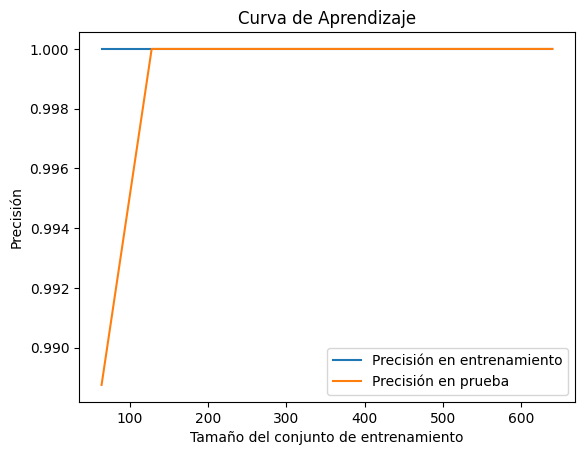

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt

# Crear el modelo
model = MLPClassifier(hidden_layer_sizes=(8, 16, 8), activation='relu', solver='adam', max_iter=1000)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
# Evaluación del modelo en el conjunto de prueba
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# No se puede generar la curva de aprendizaje en scikit-learn directamente

# Imprimir las métricas de evaluación
print(f'Precisión: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1: {f1}')
print(f'Área bajo la curva ROC: {roc_auc}')

# Calcular las medias y desviaciones estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Ploteo de la curva de aprendizaje
plt.plot(train_sizes, train_mean, label='Precisión en entrenamiento')
plt.plot(train_sizes, test_mean, label='Precisión en prueba')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje')
plt.legend()
plt.show()

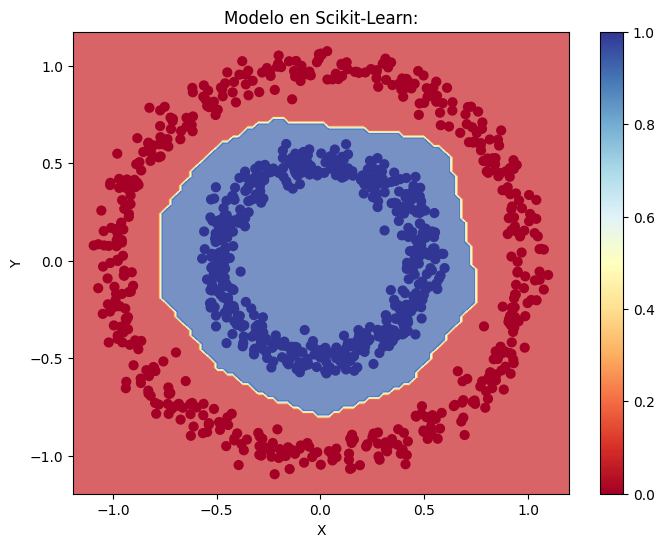

In [44]:
def plot_decision(model, X, y, title = 'Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    grid_points = np.c_[xx.ravel(), yy.ravel()]

    try:
        y_pred = model.predict(grid_points)
    except:
        x_t = torch.from_numpy(grid_points).float()
        with torch.no_grad():
            y_pred = model(x_t).detach().numpy()

    y_pred = y_pred.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(f'X')
    plt.ylabel('Y')
    plt.title(str(title))
    plt.colorbar()

plot_decision(model=model,X=X,y=y, title = 'Modelo en Scikit-Learn:')

c:\Users\Francisco\anaconda3\envs\cursoIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Francisco\anaconda3\envs\cursoIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Francisco\anaconda3\envs\cursoIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Francisco\anaconda3\envs\cursoIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\U

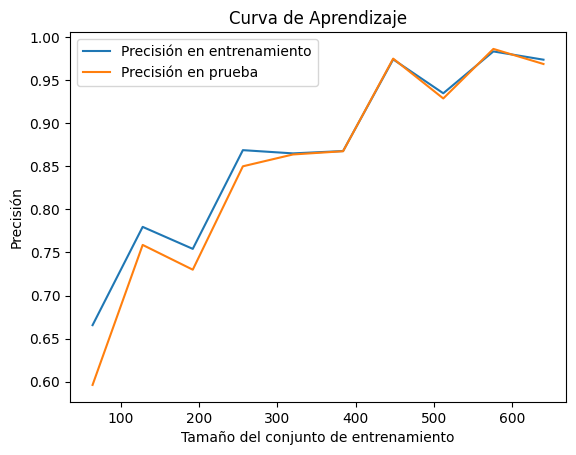

In [34]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Crear el modelo
model = MLPClassifier(hidden_layer_sizes=(8, 16, 8), activation='relu', solver='adam', max_iter=100)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular las medias y desviaciones estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Ploteo de la curva de aprendizaje
plt.plot(train_sizes, train_mean, label='Precisión en entrenamiento')
plt.plot(train_sizes, test_mean, label='Precisión en prueba')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje')
plt.legend()
plt.show()
